In [1]:
import numpy as np
from matplotlib import pyplot as plt

from pyloki.config import ParamLimits, PulsarSearchConfig
from pyloki.detection import thresholding
from pyloki.ffa import DynamicProgramming
from pyloki.pattern import generate_branching_pattern
from pyloki.periodogram import PruningStatsPlotter, ScatteredPeriodogram
from pyloki.prune import prune_dyp_tree
from pyloki.simulation.pulse import PulseSignalConfig

tobs = 2147.483648


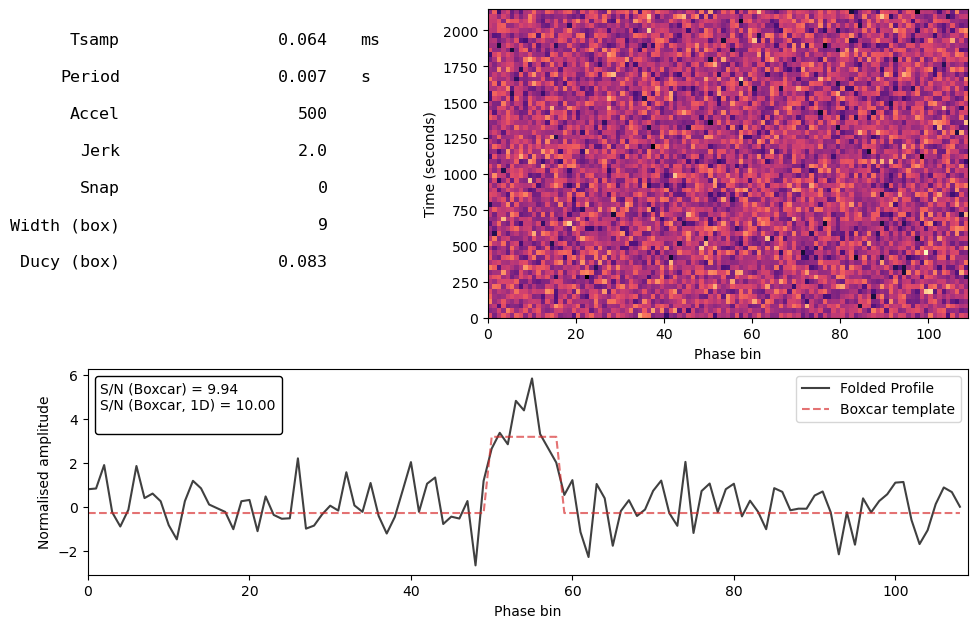

In [2]:
pulsar_period = 0.007
dt = 64e-6
accel = 500
jerk = 2.0
nsamps = 2**25
mod_kwargs = {"acc": accel, "jerk": jerk}
cfg = PulseSignalConfig(period=pulsar_period, dt=dt, nsamps=nsamps, snr=10.0, ducy=0.1,
                        mod_kwargs=mod_kwargs)
print(f"tobs = {cfg.tobs}")
tim_data = cfg.generate(shape="gaussian")
tim_data.plot_fold(cfg.freq, cfg.fold_bins, mod_kwargs=mod_kwargs)
plt.show()

In [4]:
tol_bins = 1 #cfg.tol_bins
fold_bins = 64 # cfg.fold_bins
p = ParamLimits.from_upper([jerk, accel, cfg.freq], (-2.0 * jerk, jerk * 2.0), cfg.tobs)
print(f"Param limits: {p.limits}")
bseg_brute = cfg.nsamps // 8192
bseg_ffa = cfg.nsamps // 128

search_cfg = PulsarSearchConfig(nsamps=cfg.nsamps, tsamp=cfg.dt, nbins=fold_bins, tol_bins=tol_bins, param_limits=p.limits,
                                bseg_brute=bseg_brute, bseg_ffa=bseg_ffa, prune_poly_order=3, ducy_max=0.2, wtsp=1.5,
                                use_fft_shifts=True, branch_max=32)
dyp = DynamicProgramming(tim_data, search_cfg)
dyp.initialize()
dyp.execute()

Param limits: [(np.float64(-4.0), np.float64(4.0)), (np.float64(-3794.967296), np.float64(4794.967296)), (np.float64(141.50253243280451), np.float64(144.21175328148118))]


2025-09-20 14:09:46 INFO     - pyloki.ffa - FFA initialize: Grid sizes: [3.46195593e+08 7.56275812e+06             
                             1.19209290e-01]

2025-09-20 14:09:47 INFO     - pyloki.ffa - ffa level:  0, leaves: 4.46, fold dims: (8192, 1, 1, 22, 2, 33)

                    INFO     - pyloki.ffa - ffa_initialize finished, Elapsed time: 0.683 seconds

Output()

                    INFO     - pyloki.ffa - ffa level:  1, leaves:  5.49, fold dims: (4096, 1, 1, 45, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  2, leaves:  6.49, fold dims: (2048, 1, 1, 90, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  3, leaves:  7.50, fold dims: (1024, 1, 1, 181, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  4, leaves:  8.50, fold dims: (512, 1, 1, 363, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  5, leaves:  9.51, fold dims: (256, 1, 1, 727, 2, 33)

                    INFO     - pyloki.ffa - ffa level:  6, leaves: 12.51, fold dims: (128, 1, 4, 1454, 2, 33)

                    INFO     - pyloki.ffa - FFA complete: Grid sizes: [1.32063138e+03 1.84637650e+03               
                             1.86264515e-03]

                    INFO     - pyloki.ffa - ffa_execute finished, Elapsed time: 0.367 seconds

In [7]:
branching_pattern = generate_branching_pattern(dyp.param_arr, dyp.dparams_limited, dyp.cfg.param_limits, dyp.cfg.tseg_ffa, dyp.nsegments,
                                               dyp.cfg.nbins, dyp.cfg.tol_bins, 0, use_conservative_errors=False, kind="taylor")
branching_pattern

array([8.        , 3.        , 2.        , 3.        , 1.        ,
       3.        , 2.        , 3.        , 2.01375516, 1.98624484,
       1.        , 1.        , 1.        , 9.        , 2.        ,
       1.        , 1.        , 1.        , 1.        , 3.        ,
       1.        , 1.        , 1.        , 1.        , 3.        ,
       1.        , 1.        , 1.        , 2.01375516, 1.98624484,
       2.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 3.        , 3.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 3.        , 2.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

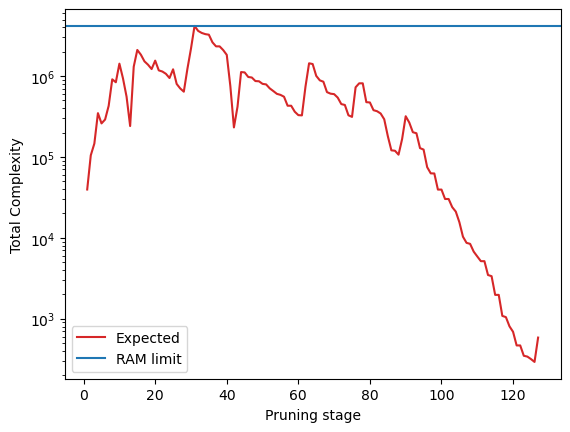

In [8]:
thresholds = np.array([2.2, 2.2, 2.5, 2.5, 2.6, 3.1, 3. , 3.1, 3.4, 3.2, 3.4, 3.6, 3.9,
       4. , 3.9, 3.8, 3.8, 3.7, 3.7, 4.2, 4.2, 3.9, 3.9, 3.9, 4.4, 4.5,
       4.4, 4.3, 4.2, 4.2, 4.1, 4.2, 4.1, 4. , 3.9, 4.2, 4.2, 3.8, 4.1,
       4.2, 4.7, 5.1, 5.2, 5.1, 4.9, 5. , 4.8, 4.9, 4.7, 4.8, 4.7, 4.8,
       4.8, 4.8, 4.7, 4.7, 4.9, 4.6, 4.9, 4.9, 4.7, 5. , 4.9, 4.8, 5.1,
       5.1, 5. , 5.2, 5.1, 5. , 5.1, 5.2, 5.1, 5.3, 5.2, 5.3, 5.3, 5. ,
       5.5, 5.3, 5.5, 5.4, 5.4, 5.5, 5.7, 5.8, 5.6, 5.7, 5.8, 5.7, 5.8,
       5.9, 5.8, 6. , 5.9, 6.1, 6.1, 5.9, 6.2, 5.9, 6.2, 5.8, 6.2, 6.2,
       6.3, 6.4, 6.4, 6.3, 6.4, 6.4, 6.4, 6. , 6.5, 6.4, 6.6, 6.3, 6.7,
       6.6, 6.7, 6.7, 6.8, 6.4, 6.8, 6.7, 6.7, 6.7, 6.3])
thresh_state = thresholding.evaluate_scheme(thresholds, branching_pattern, ref_ducy=0.1, nbins=64,
                                            ntrials=1024, snr_final=10.0, ducy_max=0.2, wtsp=1.5)
x = np.arange(1, len(branching_pattern) + 1)
plt.semilogy(x, np.array(thresh_state.get_info("complexity")) * dyp.nparam_vol, label="Expected", c="tab:red")
plt.axhline(2**22, label="RAM limit", c="tab:blue")
plt.xlabel("Pruning stage")
plt.ylabel("Total Complexity")
plt.legend()
plt.show()

In [9]:
result_file = prune_dyp_tree(dyp, thresholds, n_runs=16, max_sugg=2**22, outdir="jerk_test/", file_prefix="test_jerk",
                             kind="taylor", n_workers=4)

2025-09-20 14:11:04 INFO     - pyloki.prune - Starting Pruning for 16 runs, with 4 workers

Output()

2025-09-20 14:11:09 INFO     - worker_000 - Initializing pruning run with ref segment: 0

2025-09-20 14:11:10 INFO     - worker_000 - prune_initialize finished, Elapsed time: 1.306 seconds

2025-09-20 14:11:11 INFO     - worker_008 - Initializing pruning run with ref segment: 8

                    INFO     - worker_008 - prune_initialize finished, Elapsed time: 0.044 seconds

2025-09-20 14:11:13 INFO     - worker_017 - Initializing pruning run with ref segment: 17

                    INFO     - worker_017 - prune_initialize finished, Elapsed time: 0.043 seconds

2025-09-20 14:11:15 INFO     - worker_025 - Initializing pruning run with ref segment: 25

                    INFO     - worker_025 - prune_initialize finished, Elapsed time: 0.044 seconds

2025-09-20 14:12:26 INFO     - worker_000 - Pruning run complete for ref segment: 0

                    INFO     - worker_000 - Pruning stats: Score: 7.89, Leaves: 8.03

                    INFO     - worker_000 - Pruning time: Total: 63.8s (score: 41% | shift_add: 15% | resolve: 13% 
                             | batch_add: 12%)

                    INFO     - worker_034 - prune_initialize finished, Elapsed time: 0.016 seconds

2025-09-20 14:12:40 INFO     - worker_017 - Pruning run complete for ref segment: 17

                    INFO     - worker_017 - Pruning stats: Score: 7.67, Leaves: 8.45

                    INFO     - worker_017 - Pruning time: Total: 74.2s (score: 42% | branch: 14% | shift_add: 14% |
                             batch_add: 13%)

                    INFO     - worker_025 - Pruning run complete for ref segment: 25

                    INFO     - worker_025 - Pruning stats: Score: 7.71, Leaves: 8.30

                    INFO     - worker_025 - Pruning time: Total: 73.0s (score: 41% | shift_add: 15% | branch: 13% |
                             resolve: 12%)

2025-09-20 14:12:45 INFO     - worker_008 - Pruning run complete for ref segment: 8

                    INFO     - worker_008 - Pruning stats: Score: 7.58, Leaves: 8.57

                    INFO     - worker_008 - Pruning time: Total: 80.8s (score: 42% | shift_add: 14% | branch: 13% |
                             batch_add: 13%)

                    INFO     - worker_042 - Initializing pruning run with ref segment: 42

                    INFO     - worker_042 - prune_initialize finished, Elapsed time: 0.016 seconds

                    INFO     - worker_059 - prune_initialize finished, Elapsed time: 0.016 seconds

2025-09-20 14:13:48 INFO     - worker_034 - Pruning run complete for ref segment: 34

                    INFO     - worker_034 - Pruning stats: Score: 8.04, Leaves: 8.35

                    INFO     - worker_034 - Pruning time: Total: 69.7s (score: 41% | shift_add: 14% | batch_add:   
                             13% | resolve: 13%)

                    INFO     - worker_068 - prune_initialize finished, Elapsed time: 0.016 seconds

2025-09-20 14:14:03 INFO     - worker_051 - Pruning run complete for ref segment: 51

                    INFO     - worker_051 - Pruning stats: Score: 7.86, Leaves: 7.58

                    INFO     - worker_051 - Pruning time: Total: 69.1s (score: 41% | shift_add: 15% | branch: 13% |
                             resolve: 13%)

                    INFO     - worker_042 - Pruning run complete for ref segment: 42

                    INFO     - worker_042 - Pruning stats: Score: 7.75, Leaves: 8.57

                    INFO     - worker_042 - Pruning time: Total: 74.1s (score: 42% | batch_add: 14% | shift_add:   
                             13% | branch: 13%)

2025-09-20 14:14:17 INFO     - worker_059 - Pruning run complete for ref segment: 59

                    INFO     - worker_059 - Pruning stats: Score: 8.15, Leaves: 8.37

                    INFO     - worker_059 - Pruning time: Total: 77.0s (score: 42% | batch_add: 14% | shift_add:   
                             13% | branch: 13%)

                    INFO     - worker_076 - prune_initialize finished, Elapsed time: 0.016 seconds

                    INFO     - worker_085 - prune_initialize finished, Elapsed time: 0.017 seconds

                    INFO     - worker_093 - prune_initialize finished, Elapsed time: 0.017 seconds

2025-09-20 14:15:11 INFO     - worker_068 - Pruning run complete for ref segment: 68

                    INFO     - worker_068 - Pruning stats: Score: 7.68, Leaves: 7.63

                    INFO     - worker_068 - Pruning time: Total: 69.4s (score: 40% | shift_add: 15% | batch_add:   
                             13% | resolve: 13%)

                    INFO     - worker_102 - prune_initialize finished, Elapsed time: 0.016 seconds

2025-09-20 14:15:28 INFO     - worker_076 - Pruning run complete for ref segment: 76

                    INFO     - worker_076 - Pruning stats: Score: 7.63, Leaves: 7.92

                    INFO     - worker_076 - Pruning time: Total: 64.4s (score: 41% | shift_add: 16% | branch: 13% |
                             resolve: 13%)

                    INFO     - worker_110 - prune_initialize finished, Elapsed time: 0.016 seconds

2025-09-20 14:15:54 INFO     - worker_085 - Pruning run complete for ref segment: 85

                    INFO     - worker_085 - Pruning stats: Score: 7.60, Leaves: 7.52

                    INFO     - worker_085 - Pruning time: Total: 68.8s (score: 42% | batch_add: 14% | shift_add:   
                             14% | branch: 13%)

                    INFO     - worker_119 - prune_initialize finished, Elapsed time: 0.017 seconds

2025-09-20 14:16:20 INFO     - worker_093 - Pruning run complete for ref segment: 93

                    INFO     - worker_093 - Pruning stats: Score: 7.65, Leaves: 7.93

                    INFO     - worker_093 - Pruning time: Total: 73.1s (score: 42% | batch_add: 14% | shift_add:   
                             13% | branch: 13%)

2025-09-20 14:16:31 INFO     - worker_127 - Initializing pruning run with ref segment: 127

                    INFO     - worker_127 - prune_initialize finished, Elapsed time: 0.017 seconds

2025-09-20 14:16:37 INFO     - worker_102 - Pruning run complete for ref segment: 102

                    INFO     - worker_102 - Pruning stats: Score: 7.60, Leaves: 7.85

                    INFO     - worker_102 - Pruning time: Total: 70.0s (score: 40% | shift_add: 15% | batch_add:   
                             13% | resolve: 13%)

2025-09-20 14:17:00 INFO     - worker_110 - Pruning run complete for ref segment: 110

                    INFO     - worker_110 - Pruning stats: Score: 8.08, Leaves: 8.10

                    INFO     - worker_110 - Pruning time: Total: 64.5s (score: 41% | shift_add: 16% | branch: 13% |
                             resolve: 13%)

2025-09-20 14:17:21 INFO     - worker_119 - Pruning run complete for ref segment: 119

                    INFO     - worker_119 - Pruning stats: Score: 9.53, Leaves: 7.89

                    INFO     - worker_119 - Pruning time: Total: 63.5s (score: 42% | shift_add: 14% | batch_add:   
                             14% | branch: 13%)

2025-09-20 14:17:44 INFO     - worker_127 - Pruning run complete for ref segment: 127

                    INFO     - worker_127 - Pruning stats: Score: 7.81, Leaves: 8.28

                    INFO     - worker_127 - Pruning time: Total: 70.9s (score: 42% | shift_add: 14% | batch_add:   
                             13% | branch: 13%)

2025-09-20 14:17:45 INFO     - pyloki.prune - Pruning complete. Results saved to                                   
                             jerk_test/test_jerk_pruning_nstages_128_results.h5

In [10]:
pgram = ScatteredPeriodogram.load(result_file)
print(f"True params, j: {cfg.mod_kwargs["jerk"]:.3f}, a: {cfg.mod_kwargs["acc"]:.3f}, f: {cfg.freq:.10f}")
print(pgram.get_summary_cands(10, run_id=None))

True params, j: 2.000, a: 500.000, f: 142.8571428571
Top candidates:
dparams: djerk: 0.001207924689, daccel: 0.2090893588, dfreq: 1.455191523e-05
Run: 119_15, S/N: 9.53, jerk: 1.9993, accel: 500.11, freq: 142.857116
Run: 119_15, S/N: 9.51, jerk: 1.9993, accel: 500.11, freq: 142.857101
Run: 119_15, S/N: 8.88, jerk: 1.9993, accel: 499.90, freq: 142.857072
Run: 119_15, S/N: 8.76, jerk: 1.9993, accel: 499.90, freq: 142.857057
Run: 119_15, S/N: 8.22, jerk: 1.9993, accel: 500.11, freq: 142.857072
Run: 119_15, S/N: 8.18, jerk: 1.9993, accel: 500.11, freq: 142.857086
Run: 119_15, S/N: 8.18, jerk: 1.9981, accel: 500.07, freq: 142.857043
Run: 059_08, S/N: 8.15, jerk: 1.9999, accel: 499.83, freq: 142.857123
Run: 059_08, S/N: 8.15, jerk: 1.9999, accel: 499.83, freq: 142.857138
Run: 110_14, S/N: 8.08, jerk: 2.3450, accel: 641.41, freq: 144.744018


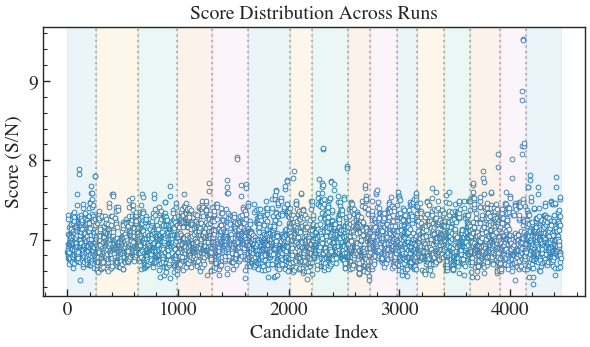

In [11]:
pgram.plot_scores(kind="scatter", run_id=None)
plt.show()

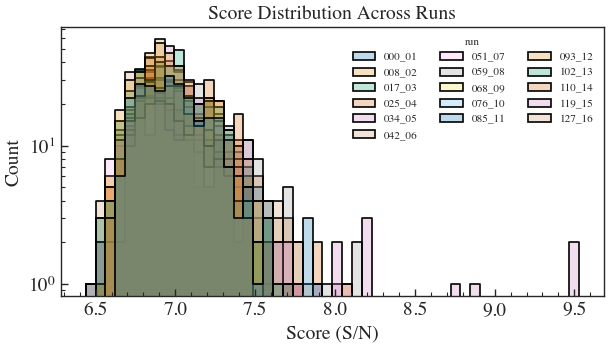

In [12]:
pgram.plot_scores(kind="hist", run_id=None)
plt.show()

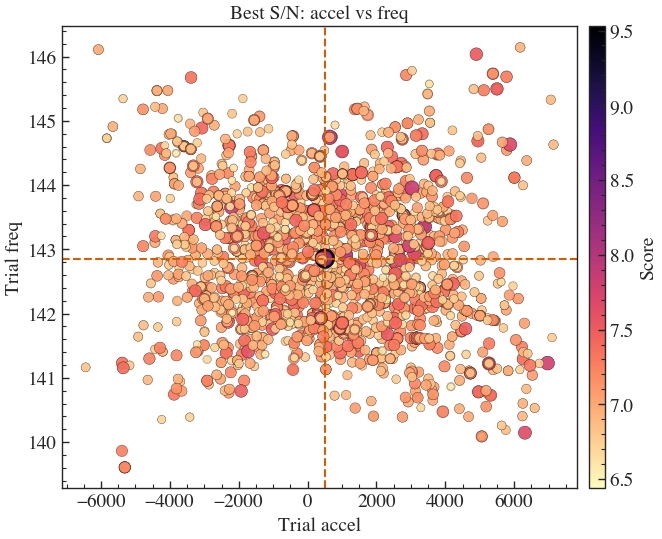

In [15]:
pgram.plot_correlation("accel", "freq", true_values={"accel": cfg.mod_kwargs["acc"], "freq": cfg.freq}, run_id=None)
plt.show()

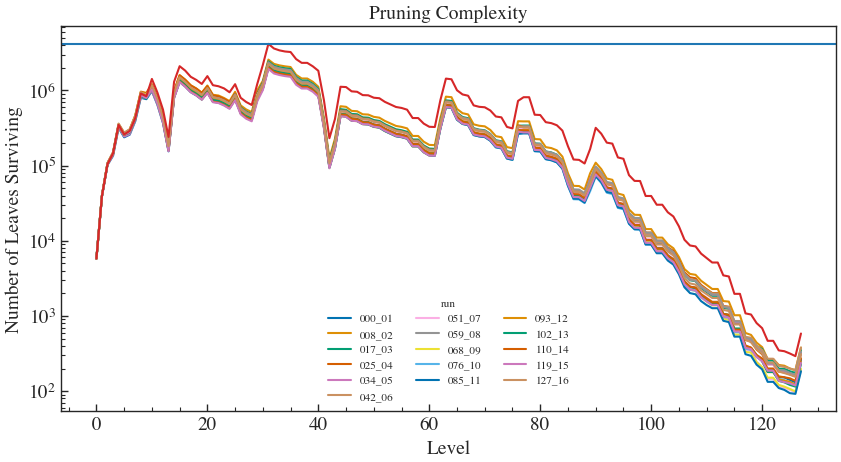

In [16]:
pstats = PruningStatsPlotter.load(result_file)
fig = pstats.plot_level_stats(run_id=None)
x = np.arange(0, len(branching_pattern) + 1)
ax_list = fig.axes
ax_list[0].plot(x, np.concatenate(([1], thresh_state.get_info("complexity"))) * dyp.nparam_vol, label="Expected", c="tab:red")
ax_list[0].axhline(2**22, label="RAM limit", c="tab:blue")
plt.show()